## Ready the Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('churn_data.csv')
customer = pd.read_csv('customer_data.csv')
internet = pd.read_csv('internet_data.csv')

In [3]:
print(churn.shape, customer.shape, internet.shape)

(7043, 9) (7043, 5) (7043, 9)


In [4]:
df = pd.merge(pd.merge(churn, customer,on='customerID'), internet, on='customerID')

In [5]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
print(df.shape)
df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null

In [7]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


# EDA

# 1. Data Cleaning

In [8]:
df.drop('customerID', inplace=True, axis=1)

In [9]:
df = pd.merge(pd.merge(churn, customer,on='customerID'), internet, on='customerID')
# Dropping the customer ID as we don't need this anymore (after merge)
df.drop('customerID', inplace=True, axis=1)
yes_no_cols = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
cat_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'MultipleLines']
no_internet_service_cat_cols = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges' ]

#map the simple Yes or No column to 1 or 0
for col in yes_no_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

#Create dummy variable with drop_first=True and concat with df.
#At last drop the column
for col in cat_cols:
    #print(df[col].value_counts())
    df[col] = df[col].apply(lambda x : col+'_'+ '_'.join(x.lower().split()) )
    #print(df[col].value_counts())
    dum = pd.get_dummies(df[col], drop_first=True, dtype=int)
    #print(dum.head())
    df = pd.concat([df, dum], axis = 1)
    df.drop(col, inplace=True, axis=1)

#Create dummy variable without drop_first=True and concat with df.
#in the new dum dataset drop the column with suffix '_no_internet_service'
#At last drop the column
for col in no_internet_service_cat_cols:
    #print(df[col].value_counts())
    df[col] = df[col].apply(lambda x : col+'_'+ '_'.join(x.lower().split()) )
    #print(df[col].value_counts())
    dum = pd.get_dummies(df[col], dtype=int)
    dum.drop(col+'_no_internet_service', inplace=True, axis=1)
    #print(dum.head())
    df = pd.concat([df, dum], axis = 1)
    df.drop(col, inplace=True, axis=1)
    
#This indictes there are 
#df['TotalCharges'].astype(float) - This given error which indicates that we need to check for missing values 
missing_values_total_charges =  df['TotalCharges'].apply(lambda x: x.isspace())
missing_values_total_charges_dict = missing_values_total_charges.value_counts()
print('missing_values percentage ' , missing_values_total_charges_dict[True]*100.0/(missing_values_total_charges_dict[True] + missing_values_total_charges_dict[False]))
print('As we are having less than 1% missing value we can delete these rows')
print(df.shape, df[missing_values_total_charges].shape, df[~missing_values_total_charges].shape)
df = df[~missing_values_total_charges]
df['TotalCharges'] = df['TotalCharges'].astype(float)

missing_values percentage  0.15618344455487718
As we are having less than 1% missing value we can delete these rows
(7043, 31) (11, 31) (7032, 31)


In [10]:
debug = False
if debug:
    for col in df.columns:
        print(df[col].value_counts())
        print('---------------------------')

In [11]:
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,gender_male,...,StreamingTV_no,StreamingTV_yes,TechSupport_no,TechSupport_yes,DeviceProtection_no,DeviceProtection_yes,OnlineBackup_no,OnlineBackup_yes,OnlineSecurity_no,OnlineSecurity_yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,2,1,1,53.85,108.15,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
4,2,1,1,70.70,151.65,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   PaperlessBilling                       7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   gender_male                            7032 non-null   int64  
 10  Contract_one_year                      7032 non-null   int64  
 11  Contract_

## 2. Checking for outliers

In [13]:
df[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


- From the describe and plot drawn we see there is no seriouse outliers are there

# 3. Visuzlize the data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

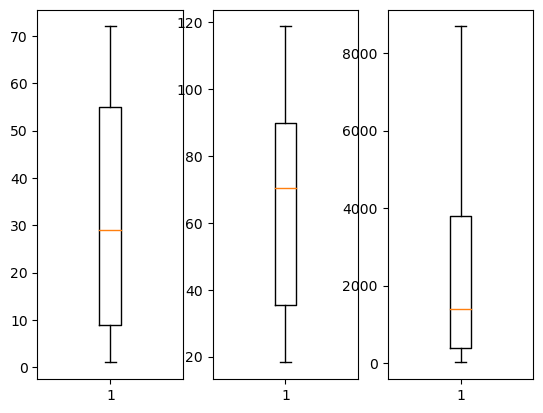

In [19]:
cnt = 1
for col in num_cols:
    plt.subplot(1,3,cnt)
    cnt+=1
    plt.boxplot(df[col])

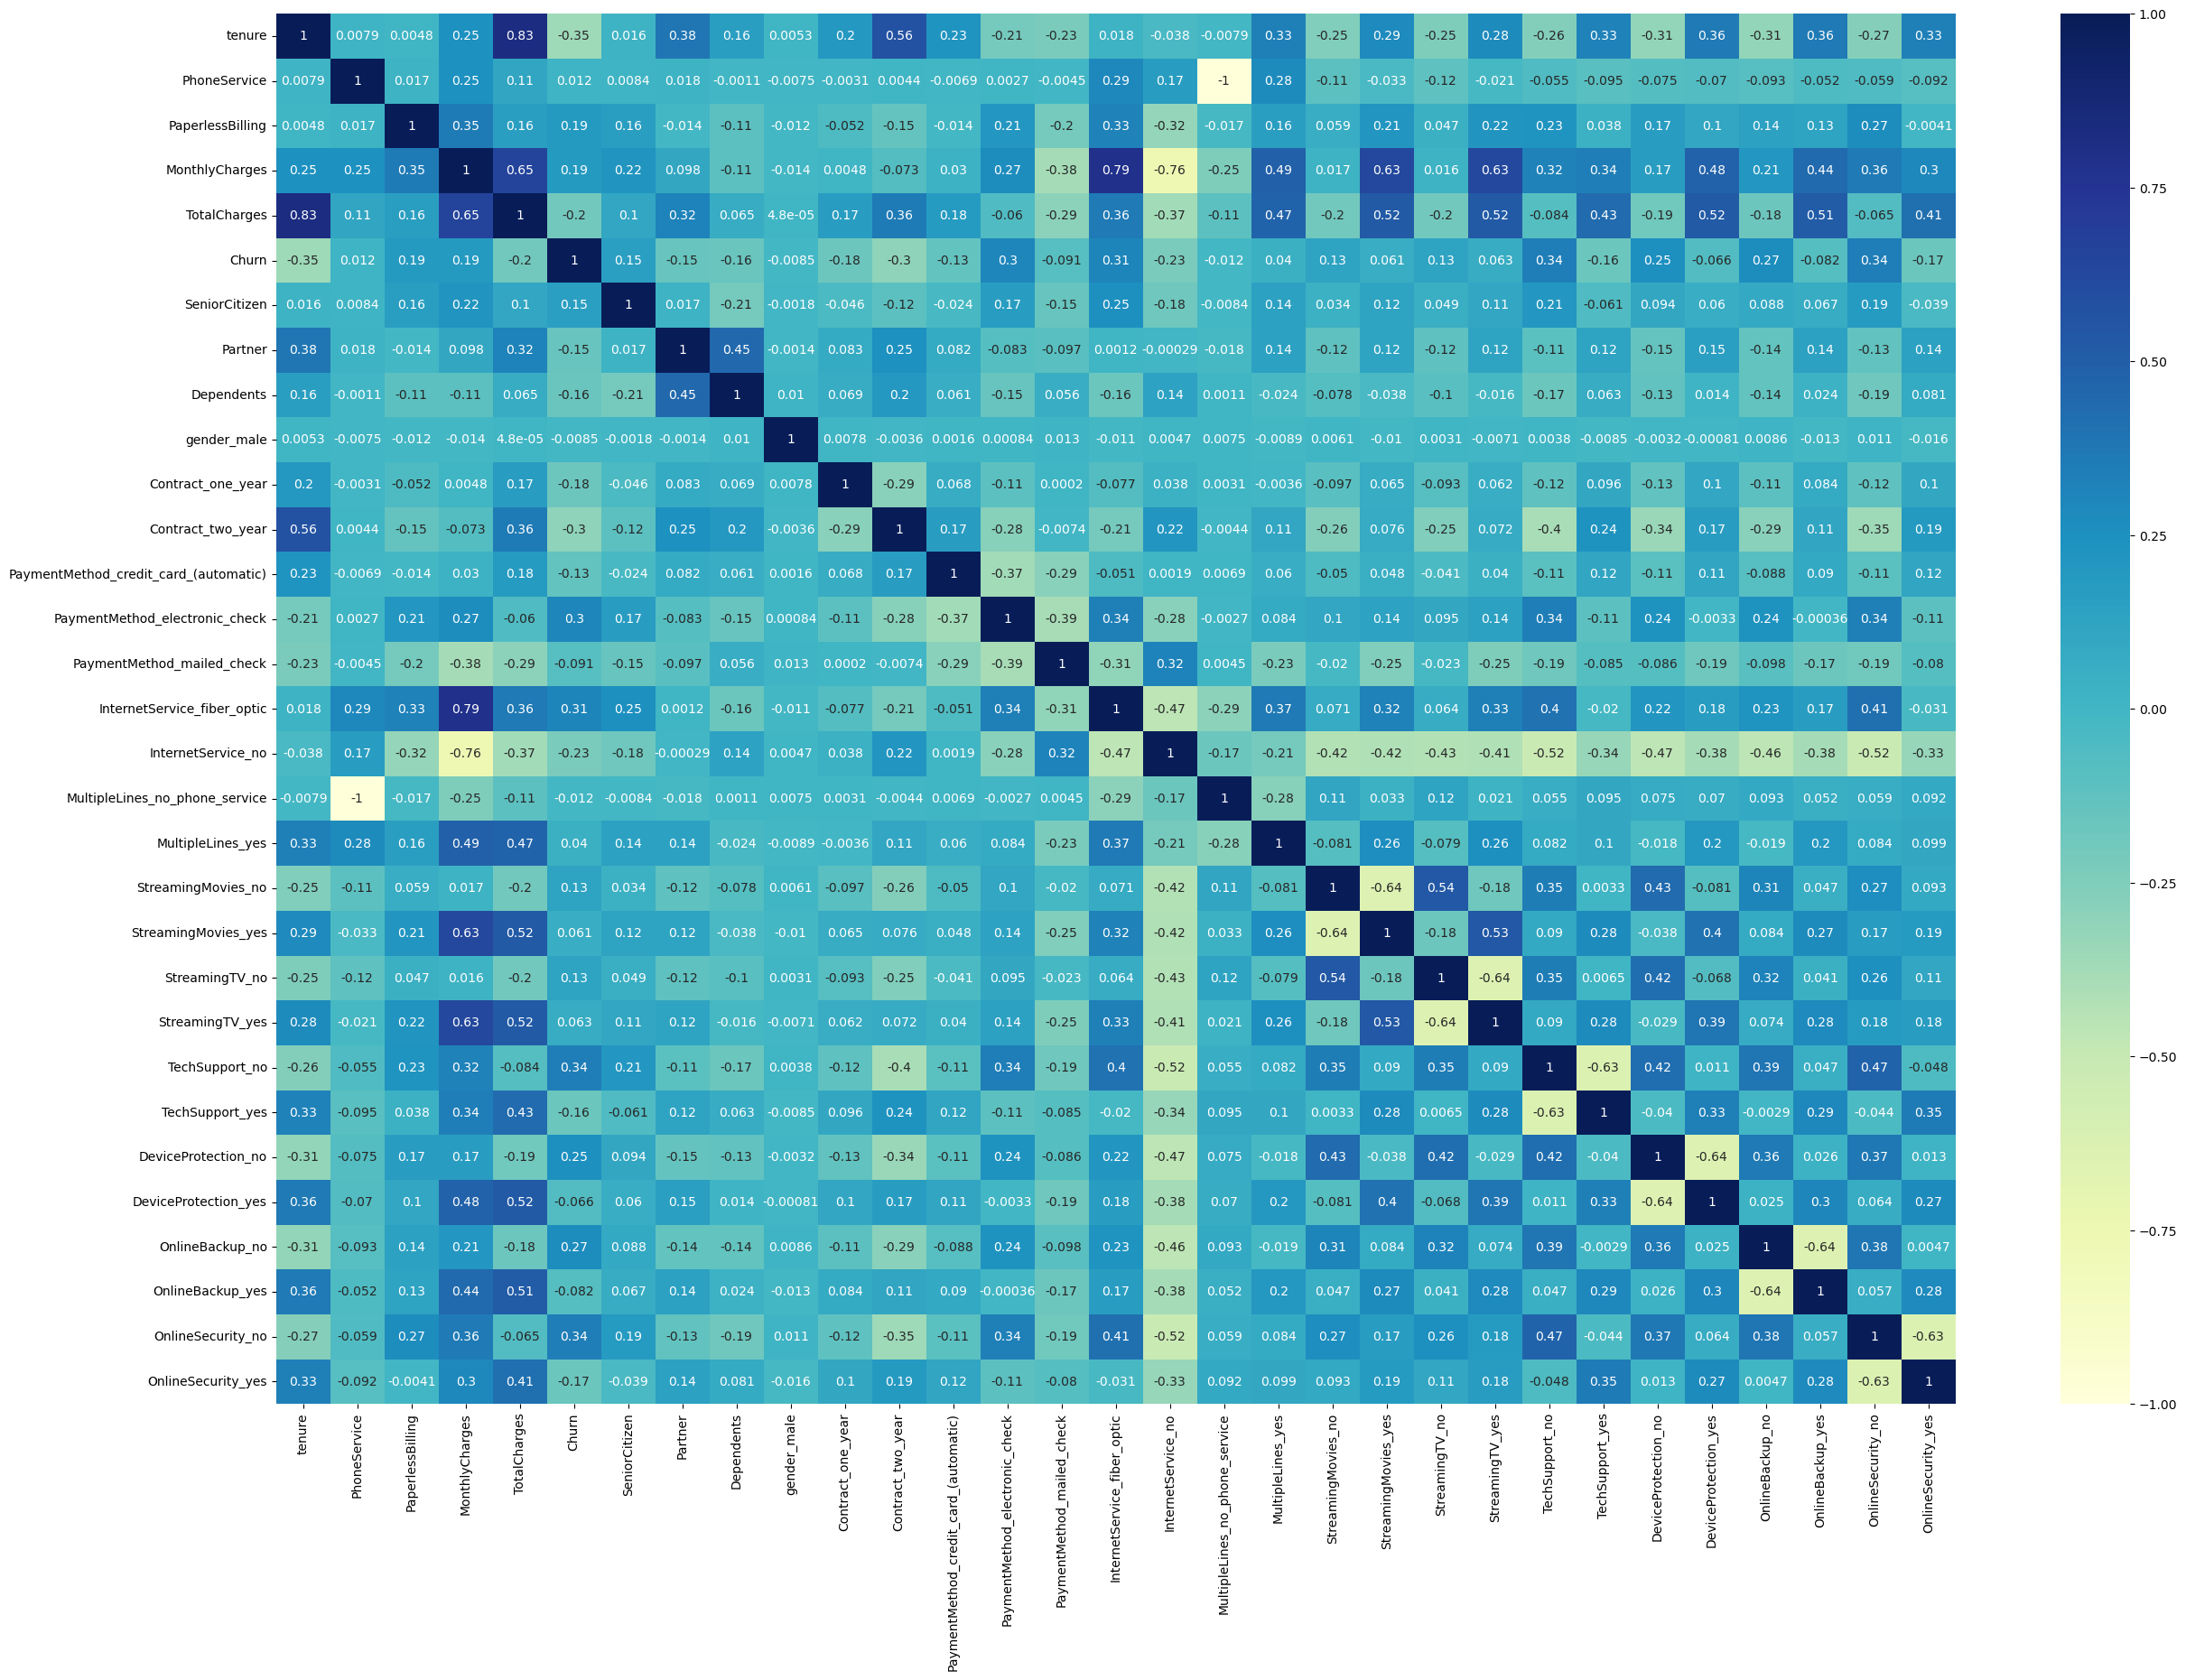

In [20]:
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

# 4. Scaling

In [21]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df.shape, df_train.shape, df_test.shape)

(7032, 31) (4922, 31) (2110, 31)


In [23]:
df_train[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,4922.000000,4922.000000,4922.000000
mean,32.517473,64.816132,2292.139313
std,24.504556,30.073758,2268.058332
min,1.000000,18.250000,18.850000
25%,9.000000,35.750000,399.700000
50%,29.000000,70.300000,1412.825000
75%,56.000000,89.900000,3786.612500
max,72.000000,118.750000,8684.800000


In [24]:
df_test[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,2110.000000,2110.000000,2110.000000
mean,32.198578,64.756398,2262.681991
std,24.644324,30.121543,2264.169456
min,1.000000,18.750000,18.800000
25%,8.000000,35.400000,415.637500
50%,29.000000,70.525000,1359.475000
75%,55.000000,89.850000,3803.725000
max,72.000000,118.650000,8594.400000


In [25]:
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [26]:
df_train[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,4922.000000,4922.000000,4922.000000
mean,0.443908,0.463345,0.262324
std,0.345135,0.299241,0.261721
min,0.000000,0.000000,0.000000
25%,0.112676,0.174129,0.043948
50%,0.394366,0.517910,0.160857
75%,0.774648,0.712935,0.434778
max,1.000000,1.000000,1.000000


In [27]:
df_test[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,2110.000000,2110.000000,2110.000000
mean,0.439417,0.462750,0.258925
std,0.347103,0.299717,0.261272
min,0.000000,0.004975,-0.000006
25%,0.098592,0.170647,0.045787
50%,0.394366,0.520149,0.154700
75%,0.760563,0.712438,0.436752
max,1.000000,0.999005,0.989568


In [30]:
y_train = df_train.pop('Churn')
X_train = df_train
y_test = df_test.pop('Churn')
X_test = df_test

# Model Building

## Using Statsmodel

In [50]:
X_train_sm = sm.add_constant(X_train)
gr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm = gr.fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 29 May 2023   Deviance:                       4009.4
Time:                        08:48:58   Pearson chi2:                 6.07e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2990      0.096     -3.100      0.002      -0.488      -0.110
tenure                                   -4.3952      0.544     -8.075      0.000      -5.462      -3.328
PhoneService                              0.3253      0.417      0.779      0.436      -0.493       1.143
PaperlessBilling                          0.3254      0.090      3.626      0.000       0.149       0.501
MonthlyCharges                           -7.2819      3.864     -1.884      0.060     -14.856       0.292
TotalCharges                              2.8015      0.751      3.730      0.000       1.329       4.274
SeniorCitizen                             0.3983      0.101      3.925      0.000       0.199       0.597
Partner                                   0.0374      0.093      0.400      0.689      -0.146       0.221
Dependents                               -0.1430      0.107     -1.337      0.181      -0.353       0.067
gender_male                              -0.0346      0.078     -0.443      0.658      -0.188       0.118
Contract_one_year                        -0.6577      0.128     -5.130      0.000      -0.909      -0.406
Contract_two_year                        -1.2454      0.210     -5.924      0.000      -1.657      -0.833
PaymentMethod_credit_card_(automatic)    -0.2577      0.136     -1.891      0.059      -0.525       0.009
PaymentMethod_electronic_check            0.1614      0.112      1.438      0.151      -0.059       0.382
PaymentMethod_mailed_check               -0.2535      0.137     -1.852      0.064      -0.522       0.015
InternetService_fiber_optic               2.5108      0.964      2.605      0.009       0.622       4.400
InternetService_no                       -1.1997      0.403     -2.977      0.003      -1.990      -0.410
MultipleLines_no_phone_service           -0.6242      0.374     -1.670      0.095      -1.357       0.108
MultipleLines_yes                         0.5620      0.213      2.634      0.008       0.144       0.980
StreamingMovies_no                        0.0265      0.058      0.455      0.649      -0.088       0.140
StreamingMovies_yes                       0.8743      0.417      2.095      0.036       0.056       1.692
StreamingTV_no                           -0.0292      0.058     -0.499      0.617      -0.144       0.085
StreamingTV_yes                           0.9300      0.417      2.228      0.026       0.112       1.748
TechSupport_no                            0.4656      0.138      3.383      0.001       0.196       0.735
TechSupport_yes                           0.4351      0.323      1.349      0.177      -0.197       1.067
DeviceProtection_no                       0.2891      0.135      2.139      0.032       0.024       0.554
DevicePro

- We can use the stats model but to arrive at the feature selection faster we can use RFE with the manual selection or rejection

## Using RFE

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score

In [62]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
rfe = RFE(logr)
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 14),
 ('Dependents', False, 7),
 ('gender_male', False, 13),
 ('Contract_one_year', True, 1),
 ('Contract_two_year', True, 1),
 ('PaymentMethod_credit_card_(automatic)', True, 1),
 ('PaymentMethod_electronic_check', False, 4),
 ('PaymentMethod_mailed_check', True, 1),
 ('InternetService_fiber_optic', True, 1),
 ('InternetService_no', False, 2),
 ('MultipleLines_no_phone_service', False, 5),
 ('MultipleLines_yes', True, 1),
 ('StreamingMovies_no', False, 16),
 ('StreamingMovies_yes', False, 3),
 ('StreamingTV_no', False, 12),
 ('StreamingTV_yes', True, 1),
 ('TechSupport_no', True, 1),
 ('TechSupport_yes', False, 8),
 ('DeviceProtection_no', False, 9),
 ('DeviceProtection_yes', False, 10),
 ('OnlineBackup_no', False, 6),
 ('OnlineBackup_yes', False, 15),
 ('OnlineSecurity_no', True, 1),
 ('OnlineSecur

In [64]:
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_one_year',
       'Contract_two_year', 'PaymentMethod_credit_card_(automatic)',
       'PaymentMethod_mailed_check', 'InternetService_fiber_optic',
       'MultipleLines_yes', 'StreamingTV_yes', 'TechSupport_no',
       'OnlineSecurity_no'],
      dtype='object')

In [65]:
rejected_cols = X_train.columns[~rfe.support_]
rejected_cols

Index(['Partner', 'Dependents', 'gender_male',
       'PaymentMethod_electronic_check', 'InternetService_no',
       'MultipleLines_no_phone_service', 'StreamingMovies_no',
       'StreamingMovies_yes', 'StreamingTV_no', 'TechSupport_yes',
       'DeviceProtection_no', 'DeviceProtection_yes', 'OnlineBackup_no',
       'OnlineBackup_yes', 'OnlineSecurity_yes'],
      dtype='object')

In [93]:
total_rejected_cols = list(rejected_cols) + ['PaymentMethod_mailed_check', 'MonthlyCharges', 'MultipleLines_yes', 'tenure']
X_train_sm = sm.add_constant(X_train.drop(total_rejected_cols, axis=1))
gr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm = gr.fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.9
Date:                Mon, 29 May 2023   Deviance:                       4125.8
Time:                        09:01:32   Pearson chi2:                 5.19e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2673
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5187      0.164     -9.254      0.000      -1.840      -1.197
PhoneService                             -0.2074      0.144     -1.437      0.151      -0.490       0.075
PaperlessBilling                          0.3518      0.088      3.994      0.000       0.179       0.524
TotalCharges                             -2.5613      0.239    -10.732      0.000      -3.029      -2.094
SeniorCitizen                             0.4346      0.099      4.406      0.000       0.241       0.628
Contract_one_year                        -0.8831      0.123     -7.163      0.000      -1.125      -0.641
Contract_two_year                        -1.6293      0.200     -8.148      0.000      -2.021      -1.237
PaymentMethod_credit_card_(automatic)    -0.3534      0.110     -3.228      0.001      -0.568      -0.139
InternetService_fiber_optic               1.1659      0.108     10.754      0.000       0.953       1.378
StreamingTV_yes                           0.5152      0.090      5.695      0.000       0.338       0.692
TechSupport_no                            0.4376      0.095      4.622      0.000       0.252       0.623
OnlineSecurity_no                         0.4943      0.095      5.217      0.000       0.309       0.680
=========================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train.drop(total_rejected_cols, axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,4.66
0,PhoneService,4.40
7,InternetService_fiber_optic,3.58
10,OnlineSecurity_no,2.89
9,TechSupport_no,2.77
1,PaperlessBilling,2.75
5,Contract_two_year,2.48
8,StreamingTV_yes,2.39
4,Contract_one_year,1.74
6,PaymentMethod_credit_card_(automatic),1.35


- From the above two sections we see that the p-value is less than 0.005 which indicates the features are significant.
- And we can notice that all VIFs are less than 5 

## Model Evaluation

In [114]:
X_train_sm = sm.add_constant(X_train.drop(total_rejected_cols, axis=1))
y_train_pred = logm.predict(X_train_sm).map(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_train_pred, y_train))

0.7992685900040634


In [113]:
X_test_sm = sm.add_constant(X_test.drop(total_rejected_cols, axis=1))
y_test_pred = logm.predict(X_test_sm).map(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test_pred, y_test))

0.790521327014218
